In [1]:
# import necessary library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# represents the dataframe
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# drops the null values
df = df.dropna()

nan_count = df.isna().sum()
print(nan_count)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Text(95.58159722222221, 0.5, 'Features')

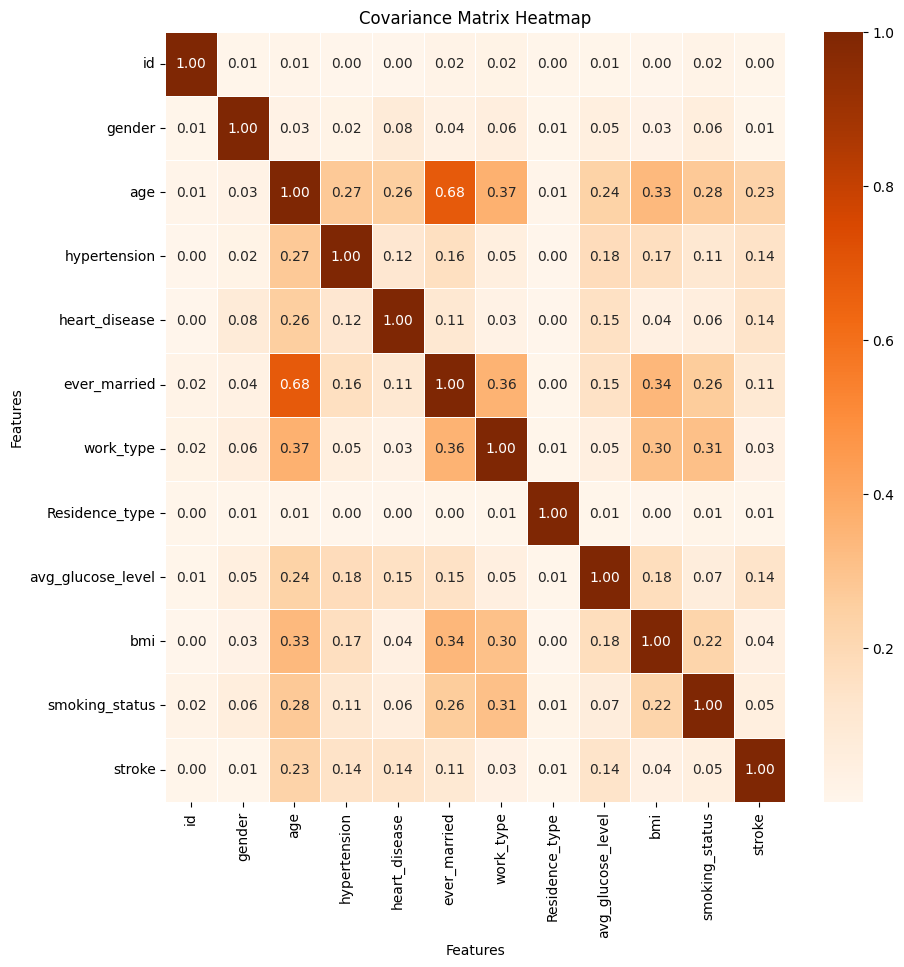

In [5]:
# preprocessing label encoding
label_encoder = LabelEncoder()
scaler= StandardScaler()
df = df.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'O' else x)
trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
cov_matrix = abs(trainup.cov())
plt.figure(figsize=(10, 10))
sns.heatmap(cov_matrix, annot=True, cmap='Oranges', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
#plt.savefig('correlation_fig.png', bbox_inches='tight')

In [6]:
# creates a new dataframe that takes out the unknown values for smoking status
df_new = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_new = df_new[df_new['smoking_status'] != 'Unknown']
df_new


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [7]:
import altair as alt

# define an interactive selection feature
selection = alt.selection_interval()

# base scatter plot
base = alt.Chart(df_new).mark_circle(opacity=0.2).encode(
    x='age:Q',  
    y='bmi:Q',  
    color='stroke:N'  
).properties(
    width=200,
    height=200,
    title='Age vs. BMI for stroke and non-stroke patients'
)

# additional layer to highlight stroke = 1
stroke_highlight = base.transform_filter(
    alt.datum.stroke == 1  
).mark_circle(
    size=10, 
    opacity=1  
)

# combine the plots
points = alt.layer(base, stroke_highlight).add_params(
    selection 
)

# bar chart that gets updated based on the selection made on the scatter plot
bars = alt.Chart(df_new).mark_bar().encode(
    x='count()',
    y='smoking_status:N',
    color=alt.Color('avg_glucose_level:Q', aggregate='mean', scale=alt.Scale(scheme='category10'))
).transform_filter(
    selection
).properties(
    width=200,
    height=200,
    title='Smoking status count'
)

# combine scatter plot and bar chart side by side
chart = points | bars

chart


alt.HConcatChart(...)

In [8]:
# sets the stroke label
df['stroke_label'] = df['stroke'].apply(lambda x: 'Stroke' if x == 1 else 'Not Stroke')

# xox plot for age distribution by gender
box_plot_age = alt.Chart(df).mark_boxplot().encode(
    y= alt.Y('age:Q', title = 'Age'),
    x=alt.X('stroke_label:N', title = 'Stroke'),
).properties(
    width=150,
    height=300,
    title = 'Age distribution'
)

# represents the boxplot for average glucose leve

box_plot_avg = alt.Chart(df).mark_boxplot().encode(
    y= alt.Y('avg_glucose_level:Q', title = 'Average Glucose Level'),
    x=alt.X('stroke_label:N', title = 'Stroke'),
).properties(
    width=150,
    height=300,
    title = 'Average Glucose level distribution'
)

# represents the boxplot for BMI
box_plot_bmi = alt.Chart(df).mark_boxplot().encode(
    y= alt.Y('bmi:Q', title = 'BMI'),
    x=alt.X('stroke_label:N', title = 'Stroke'),
).properties(
    width=150,
    height=300,
    title = 'BMI distribution'
)

# combine box plots together
combined_chart = box_plot_age | box_plot_avg | box_plot_bmi
combined_chart


alt.HConcatChart(...)

In [9]:
height=100
width=150

# function to create a chart with percentage and text labels for a given category
def create_percentage_chart(df, category: str, title: str):
    base_chart = alt.Chart(df).transform_aggregate(
        total='count()',
        groupby=[category, 'stroke']
    ).transform_joinaggregate(
        total_category='sum(total)',
        groupby=[category]
    ).transform_filter(
        alt.datum.stroke == 1
    ).transform_calculate(
        percentage='datum.total / datum.total_category'
    )

    bars = base_chart.mark_bar().encode(
        x=alt.X(f'{category}:N', title=title),
        y=alt.Y('percentage:Q', axis=alt.Axis(format='.1%'), title='Percentage'),
        color='stroke:N',
        tooltip=[alt.Tooltip('percentage:Q', title='Stroke Prevalence', format='.1%')]
    )

    text = base_chart.mark_text(align='center', baseline='middle', dy=-10).encode(
        x=alt.X(f'{category}:N'),
        y=alt.Y('percentage:Q'),
        text=alt.Text('percentage:Q', format='.1%'),
        detail='stroke:N',
        color=alt.value('white')
    ).transform_filter(
        alt.datum.stroke == 1
    )

    return (bars + text).properties(width=width, height=height, title=title)


# create charts for each category
chart1 = create_percentage_chart(df, 'gender', 'Gender Prevalence of Stroke (%)')
chart2 = create_percentage_chart(df, 'hypertension', 'Hypertension Prevalence of Stroke (%)')
chart3 = create_percentage_chart(df, 'ever_married', 'Marriage Status Prevalence of Stroke (%)')
chart4 = create_percentage_chart(df, 'work_type', 'Work Type Prevalence of Stroke (%)')
chart5 = create_percentage_chart(df, 'Residence_type', 'Residence Type Prevalence of Stroke (%)')
chart6 = create_percentage_chart(df, 'smoking_status', 'Smoking Status Prevalence of Stroke (%)')

# bar chart for 'age'
chart7 = alt.Chart(df).transform_bin(
    'age_bin', field='age', bin=alt.Bin(maxbins=20)  
).transform_aggregate(
    total='count()',
    groupby=['age_bin', 'stroke']
).transform_joinaggregate(
    total_bin='sum(total)',
    groupby=['age_bin']
).transform_filter(
    alt.datum.stroke == 1  
).transform_calculate(
    percentage='datum.total / datum.total_bin'
).mark_bar().encode(
    x=alt.X('age_bin:O', title='Age'),
    y=alt.Y('percentage:Q', axis=alt.Axis(format='.1%'), title='Stroke Prevalence'),
    color='stroke:N',
    tooltip=[alt.Tooltip('percentage:Q', title='Stroke Prevalence', format='.1%')]
).properties(
    width=width, height=height,
    title='Age Prevalence of Stroke (%)'
)

# bar chart for 'avg_glucose_level'
chart8 = alt.Chart(df).transform_bin(
    'glucose_bin', field='avg_glucose_level', bin=alt.Bin(maxbins=20)  
).transform_aggregate(
    total='count()',
    groupby=['glucose_bin', 'stroke']
).transform_joinaggregate(
    total_bin='sum(total)',
    groupby=['glucose_bin']
).transform_filter(
    alt.datum.stroke == 1
).transform_calculate(
    percentage='datum.total / datum.total_bin'
).mark_bar().encode(
    x=alt.X('glucose_bin:O', title='Average Glucose Level'),
    y=alt.Y('percentage:Q', axis=alt.Axis(format='.1%'), title='Stroke Prevalence'),
    color='stroke:N',
    tooltip=[alt.Tooltip('percentage:Q', title='Stroke Prevalence', format='.1%')]
).properties(
    width=width, height=height,
    title='Avg Glucose Level Prevalence of Stroke (%)'
)

# bar chart for 'bmi'
chart9 = alt.Chart(df).transform_bin(
    'bmi_bin', field='bmi', bin=alt.Bin(maxbins=20) 
).transform_aggregate(
    total='count()',
    groupby=['bmi_bin', 'stroke']
).transform_joinaggregate(
    total_bin='sum(total)',
    groupby=['bmi_bin']
).transform_filter(
    alt.datum.stroke == 1  
).transform_calculate(
    percentage='datum.total / datum.total_bin'
).mark_bar().encode(
    x=alt.X('bmi_bin:O', title='BMI'),
    y=alt.Y('percentage:Q', axis=alt.Axis(format='.1%'), title='Stroke Prevalence'),
    color='stroke:N',
    tooltip=[alt.Tooltip('percentage:Q', title='Stroke Prevalence', format='.1%')]
).properties(
    width=width, height=height,
    title='BMI Prevalence of Stroke (%)'
)


# combine and display charts as needed
combined_chart = (chart1 | chart2 | chart3 ) & (chart4 | chart5 | chart6) & (chart7 | chart8 | chart9)

combined_chart.display()

alt.VConcatChart(...)